# Devoir H23

## Table des Matières


* [Partie 1 a)](#partie-1-a)
    * [Histogramme](#histogramme)
    * [Diagramme de Tukey](#diagramme-de-tukey)
    * [Droite de Henry](#droite-de-henry)
    * [Test de Shapiro-Wilk](#test-de-shapiro-wilk)
    * [Tableau des statistiques descriptives](#tableau-des-statistiques-descriptives)
* [Partie 1 b)](#partie-1-b)
    * [Histogrammes](#histogrammes)
    * [Diagrammes de Tukey](#diagrammes-de-tukey)
    * [Tableau des statistiques descriptives](#tableau-des-statistiques-descriptives)
    * [Test d'hypothèses sur l'égalité des variances](#test-dhypothèses-sur-légalité-des-variances)

Avant de commencer les analyses, nous devons obtenir un ensemble personnalisé de données grâce à l’un de nos matricules. 

In [39]:
import pandas as pd
import random

random.seed(2051829)
df = pd.read_csv("DevoirDH23.csv", sep=";", decimal=",")
df = df.iloc[random.sample(range(290), 195), 1:]

## Partie 1 a)


### Histogramme

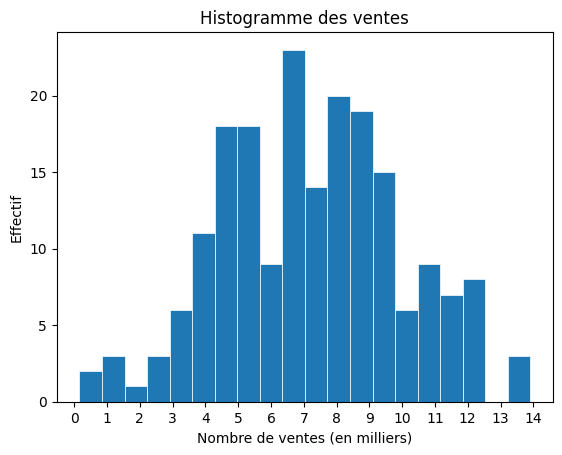

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.hist(df["Sales"], bins=20, linewidth=0.5, edgecolor="white")
ax.set_xticks(np.arange(0, 15, 1))
ax.set_title("Histogramme des ventes")
ax.set_xlabel("Nombre de ventes (en milliers)")
ax.set_ylabel("Effectif")

plt.show()

Comme nous pouvons le voir avec cet histogramme, la plupart des points de vente vendent entre 4500 et 9000 sièges. 

### Diagramme de Tukey

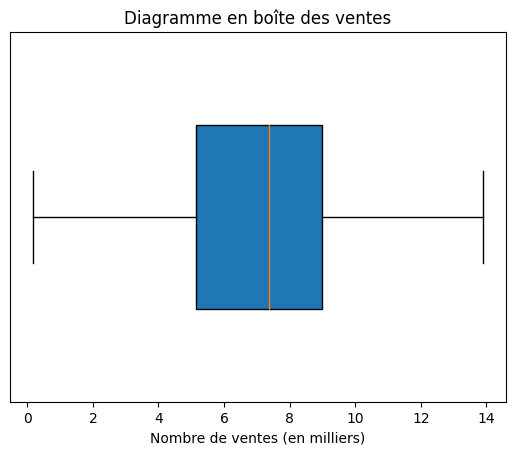

In [41]:
fig, ax = plt.subplots()
ax.boxplot(df['Sales'], vert=False, patch_artist=True,
            manage_ticks=True, widths=0.5,
            showmeans=False, showfliers=False,)
ax.set_title("Diagramme en boîte des ventes")
ax.set_xlabel("Nombre de ventes (en milliers)")
ax.set_yticks([])

plt.show()

Les conclusions que l’on peut tirer de ce diagramme de Tukey confirment, ce que nous montre déjà l’histogramme. On peut préciser que l’IQR est relativement faible par rapport à l’étendue de l’échantillon. Ce qui affirme donc bien que la majorité des points de vente vendent entre 4500 et 9000 sièges.

### Droite de Henry

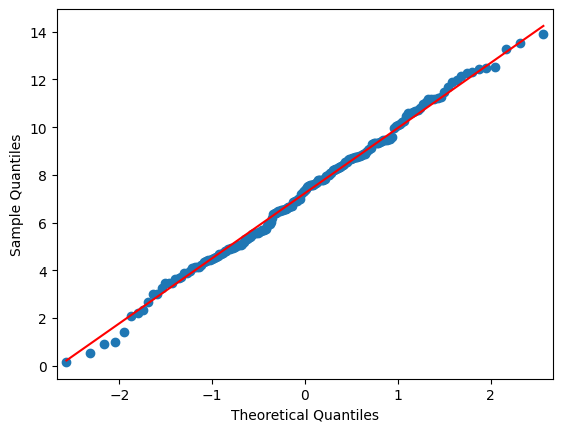

In [42]:
import statsmodels.api as sm
fig, ax = plt.subplots()
sm.ProbPlot(df['Sales']).qqplot(line='s', ax=ax)
plt.show()


La droite de Henry nous montre que la distribution des ventes semble proche d’une distribution normale.
Vérifions ça avec un test de normalité.

### Test de Shapiro-Wilk

In [43]:
import scipy.stats as stats
W, p = stats.shapiro(df['Sales'])

print(f'W :{W}, p-value : {p}')
if p > 0.05:
    print("La distribution des ventes suit une loi normale")
else:
    print("La distribution des ventes ne suit pas une loi normale")

W :0.9945443272590637, p-value : 0.6997796297073364
La distribution des ventes suit une loi normale


D’après les résultats précédents, on peut déduire que la distribution des ventes de notre échantillon suit une loi normale.

### Tableau des statistiques descriptives

In [44]:
mean = df['Sales'].mean()
std = df['Sales'].std()
interval = stats.norm.interval(confidence=0.95, loc=mean, scale=stats.sem(df['Sales']))
interval = [round(x, 3) for x in interval]
table = pd.DataFrame({'Moyenne': [mean], 'Ecart-type': [std], 'Intervalle de confiance': [interval]})
table.index = ['Ventes']
table.transpose()

,Ventes
Moyenne,7.233538
Ecart-type,2.73685
Intervalle de confiance,"[6.849, 7.618]"


Voici ci-dessus le tableau contenant la moyenne l’écart-type et l’intervalle de confiance à 95 % de la moyenne

## Partie 1 b)

### Histogrammes

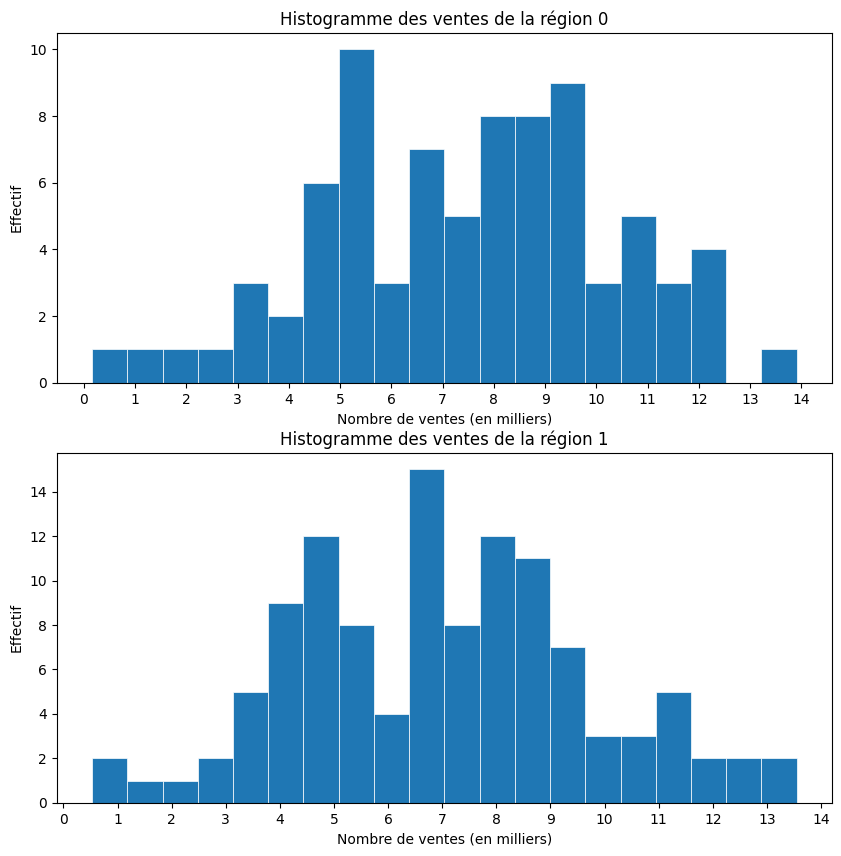

In [45]:
region0 = df.loc[df['Region'] == 0, 'Sales']
region1 = df.loc[df['Region'] == 1, 'Sales']
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].hist(region0, bins=20, linewidth=0.5, edgecolor="white")
ax[0].set_xticks(np.arange(0, 15, 1))
ax[0].set_title("Histogramme des ventes de la région 0")
ax[0].set_xlabel("Nombre de ventes (en milliers)")
ax[0].set_ylabel("Effectif")

ax[1].hist(region1, bins=20, linewidth=0.5, edgecolor="white")
ax[1].set_xticks(np.arange(0, 15, 1))
ax[1].set_title("Histogramme des ventes de la région 1")
ax[1].set_xlabel("Nombre de ventes (en milliers)")
ax[1].set_ylabel("Effectif")

plt.show()

On remarque une distribution légèrement différente entre les deux régions

### Diagrammes de Tukey

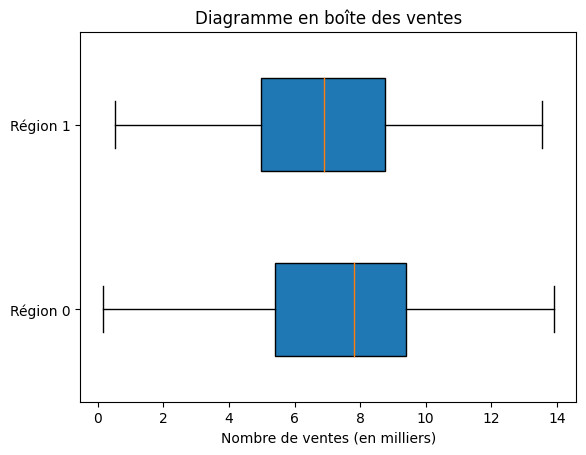

In [46]:
fig, ax = plt.subplots()
ax.boxplot([region0, region1], vert=False, patch_artist=True,
            manage_ticks=True, widths=0.5,
            showmeans=False, showfliers=False,)
ax.set_title("Diagramme en boîte des ventes")
ax.set_xlabel("Nombre de ventes (en milliers)")
ax.set_yticks([1, 2])
ax.set_yticklabels(['Région 0', 'Région 1'])

plt.show()

### Tableau des statistiques descriptives

In [47]:
mean0 = region0.mean()
quartiles0 = np.quantile(region0, [0.25, 0.5, 0.75])
quartiles0 = [round(x, 3) for x in quartiles0]
std0 = region0.std()
var0 = region0.var()
interval0 = stats.norm.interval(confidence=0.95, loc=mean0, scale=stats.sem(region0))
interval0 = [round(x, 3) for x in interval0]

mean1 = region1.mean()
quartiles1 = np.quantile(region1, [0.25, 0.5, 0.75])
quartiles1 = [round(x, 3) for x in quartiles1]
std1 = region1.std()
var1 = region1.var()
interval1 = stats.norm.interval(confidence=0.95, loc=mean1, scale=stats.sem(region1))
interval1 = [round(x, 3) for x in interval1]

table = pd.DataFrame({'Moyenne': [mean0, mean1], '1er Quartile': [quartiles0[0], quartiles1[0]],
                      'Médiane': [quartiles0[1], quartiles1[1]], '3e Quartile': [quartiles0[2], quartiles1[2]],
                      'Variance': [var0, var1],'Écart-type': [std0, std1],
                      'Intervalle de confiance': [interval0, interval1]})
table.index = ['Région 0', 'Région 1']
table.transpose()

,Région 0,Région 1
Moyenne,7.496296,7.046842
1er Quartile,5.4,4.988
Médiane,7.8,6.89
3e Quartile,9.4,8.76
Variance,7.936814,7.155896
Écart-type,2.817235,2.675051
Intervalle de confiance,"[6.883, 8.11]","[6.556, 7.538]"


### Test d'hypothèses sur l'égalité des variances

In [48]:
W0, p0 = stats.shapiro(region0)
W1, p1 = stats.shapiro(region1)
print(f'p-value région 0 : {p0} et p-value région 1 : {p1}')

p-value région 0 : 0.9009557366371155 et p-value région 1 : 0.7894648909568787


On pose H1, les variances sont différentes.
Les 2 distributions suivent une loi normale, donc on effectue le test d’hypothèses sur l’égalité des variances de cette manière :

In [49]:
f0 = var0/var1
pvalue = stats.f.sf(f0, region0.size-1, region1.size-1)
print(f'p-value : {pvalue}')


p-value : 0.30394363562874543


La p-value est supérieure à 0,05, alors on ne peut pas rejeter que l’hypothèse d’égalité des 2 variances

### Test d'hypothèses sur l'égalité des moyennes

Posons H0 : µ0 - µ1 = 0 et H1 : µ0 - µ1 ≠ 0.
Nous sommes dans le cas où les variances sont inconnues par contre on peut assumer que les variances échantillonnales sont égales, on peut donc utiliser la loi de Student : 

In [50]:
testMean = stats.ttest_ind(region0, region1, equal_var=True)
print(f'p-value : {testMean.pvalue}')

p-value : 0.2595006381194333


La p-value est supérieure à 0,05, on ne rejette pas l’hypothèse nulle. On peut donc conclure que les deux échantillons proviennent de populations ayant la même moyenne.

Finalement, nous pouvons conclure que les ventes ne sont pas affectées par le lieu du point de vente.

## Partie 2

### Modèle 1

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     46.14
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.33e-10
Time:                        00:47:05   Log-Likelihood:                -451.62
No. Observations:                 195   AIC:                             907.2
Df Residuals:                     193   BIC:                             913.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3928      0.924     14.498      0.0

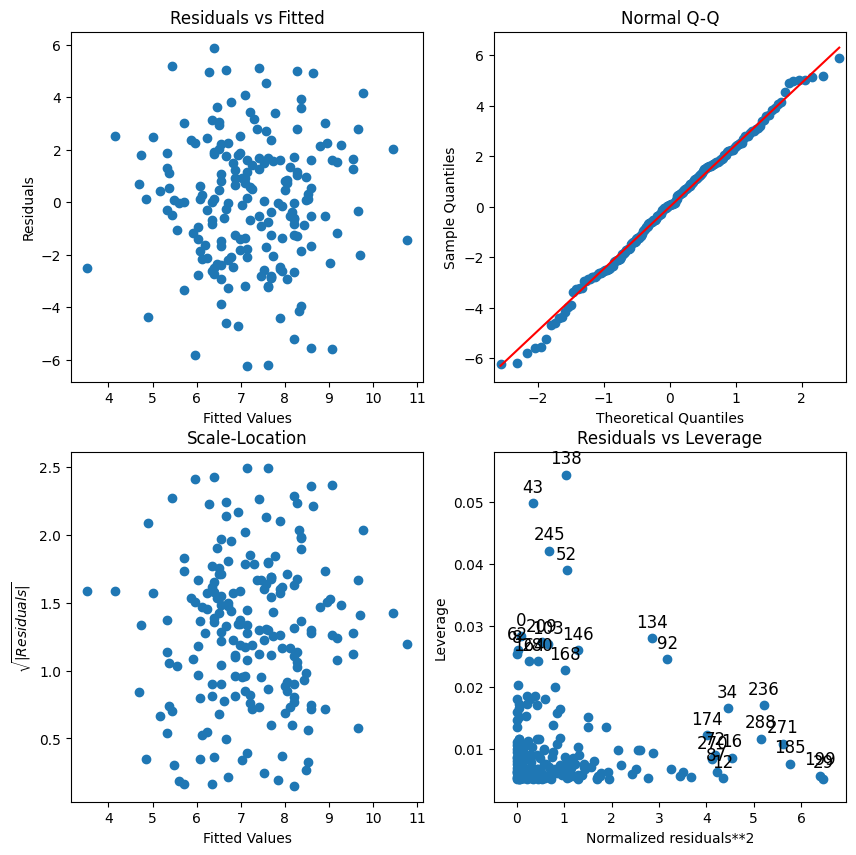

In [74]:
modele1 = sm.formula.ols('Sales ~ Price', data=df).fit()
print(modele1.summary())

anova = sm.stats.anova_lm(modele1)
print(anova)

residuals = modele1.resid
fitted = modele1.fittedvalues
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].scatter(fitted, residuals)
ax[0][0].set_xlabel('Fitted Values')
ax[0][0].set_ylabel('Residuals')
ax[0][0].set_title('Residuals vs Fitted')

sm.qqplot(residuals, line='s', ax=ax[0][1])
ax[0][1].set_title('Normal Q-Q')

sqrt_abs_residuals = np.sqrt(np.abs(residuals))
ax[1][0].scatter(fitted, sqrt_abs_residuals)
ax[1][0].set_xlabel('Fitted Values')
ax[1][0].set_ylabel('$\sqrt{|Residuals|}$')
ax[1][0].set_title('Scale-Location')

sm.graphics.plot_leverage_resid2(modele1, ax=ax[1][1])
ax[1][1].set_title('Residuals vs Leverage')
plt.show()

### Modèle 2

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     30.78
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           9.45e-08
Time:                        00:47:22   Log-Likelihood:                -143.64
No. Observations:                 195   AIC:                             291.3
Df Residuals:                     193   BIC:                             297.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.4949      0.834      7.791

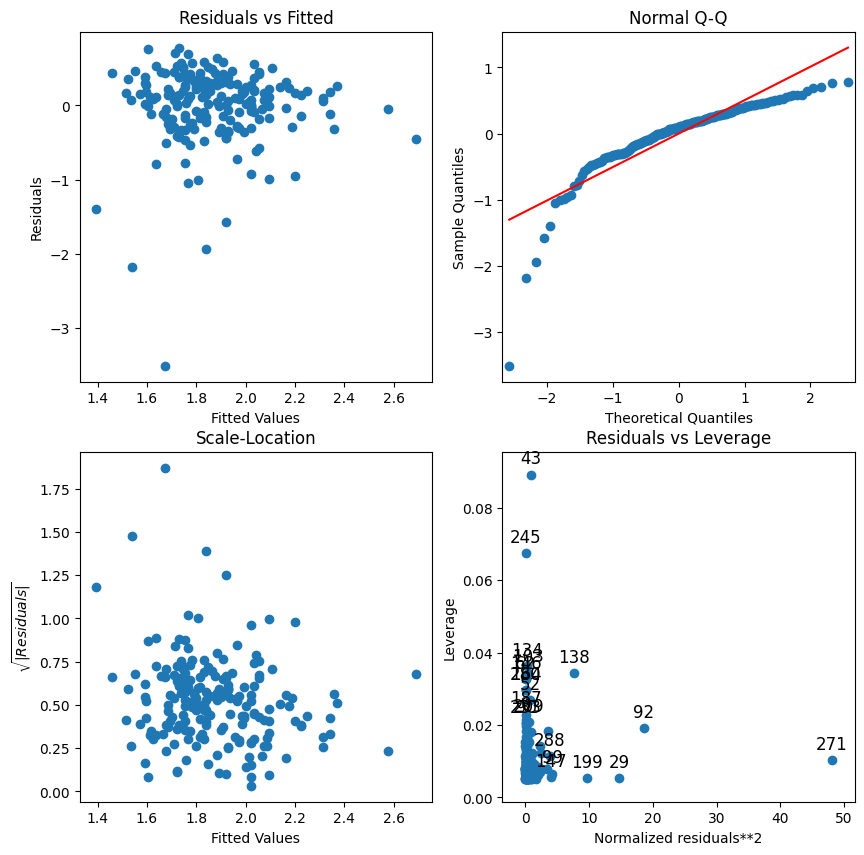

In [75]:
modele2 = sm.formula.ols('np.log(Sales) ~ np.log(Price)', data=df).fit()
print(modele2.summary())

anova = sm.stats.anova_lm(modele2)
print(anova)

residuals = modele2.resid
fitted = modele2.fittedvalues
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].scatter(fitted, residuals)
ax[0][0].set_xlabel('Fitted Values')
ax[0][0].set_ylabel('Residuals')
ax[0][0].set_title('Residuals vs Fitted')

sm.qqplot(residuals, line='s', ax=ax[0][1])
ax[0][1].set_title('Normal Q-Q')

sqrt_abs_residuals = np.sqrt(np.abs(residuals))
ax[1][0].scatter(fitted, sqrt_abs_residuals)
ax[1][0].set_xlabel('Fitted Values')
ax[1][0].set_ylabel('$\sqrt{|Residuals|}$')
ax[1][0].set_title('Scale-Location')

sm.graphics.plot_leverage_resid2(modele2, ax=ax[1][1])
ax[1][1].set_title('Residuals vs Leverage')
plt.show()

### Modèle 3

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     32.71
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           4.03e-08
Time:                        00:47:29   Log-Likelihood:                -142.80
No. Observations:                 195   AIC:                             289.6
Df Residuals:                     193   BIC:                             296.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9387      0.190     15.502      0.0

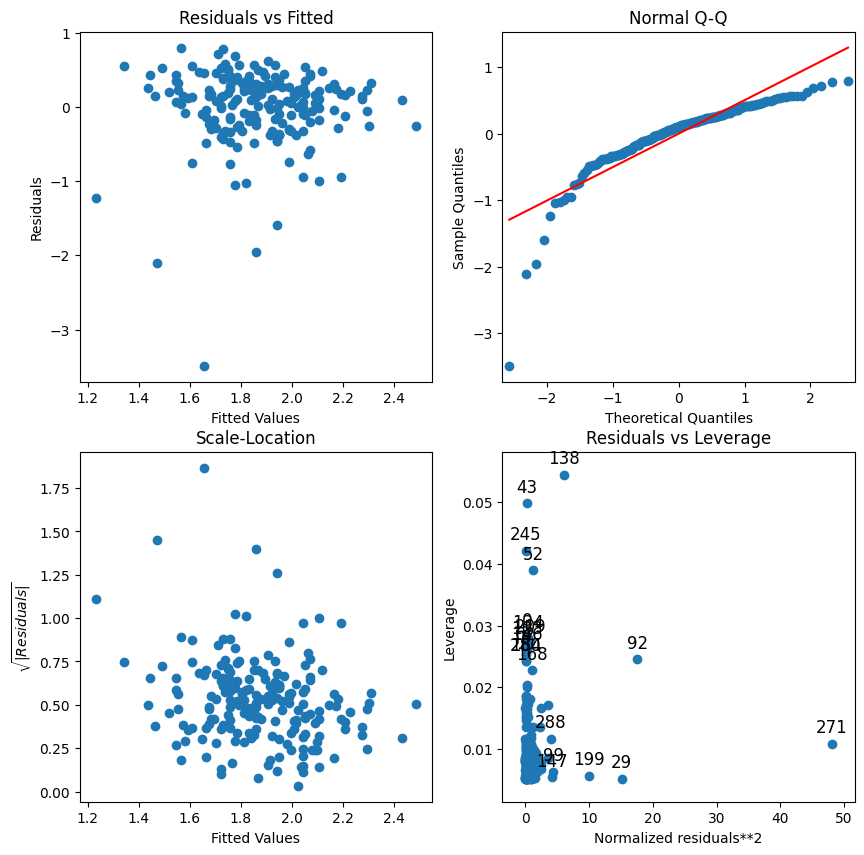

In [76]:
modele3 = sm.formula.ols('np.log(Sales) ~ Price', data=df).fit()
print(modele3.summary())

anova = sm.stats.anova_lm(modele3)
print(anova)

residuals = modele3.resid
fitted = modele3.fittedvalues
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].scatter(fitted, residuals)
ax[0][0].set_xlabel('Fitted Values')
ax[0][0].set_ylabel('Residuals')
ax[0][0].set_title('Residuals vs Fitted')

sm.qqplot(residuals, line='s', ax=ax[0][1])
ax[0][1].set_title('Normal Q-Q')

sqrt_abs_residuals = np.sqrt(np.abs(residuals))
ax[1][0].scatter(fitted, sqrt_abs_residuals)
ax[1][0].set_xlabel('Fitted Values')
ax[1][0].set_ylabel('$\sqrt{|Residuals|}$')
ax[1][0].set_title('Scale-Location')

sm.graphics.plot_leverage_resid2(modele3, ax=ax[1][1])
ax[1][1].set_title('Residuals vs Leverage')
plt.show()

### Modèle 4

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     16.72
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           6.35e-05
Time:                        00:46:13   Log-Likelihood:                -464.42
No. Observations:                 195   AIC:                             932.8
Df Residuals:                     193   BIC:                             939.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.4525      0.268     24.045      

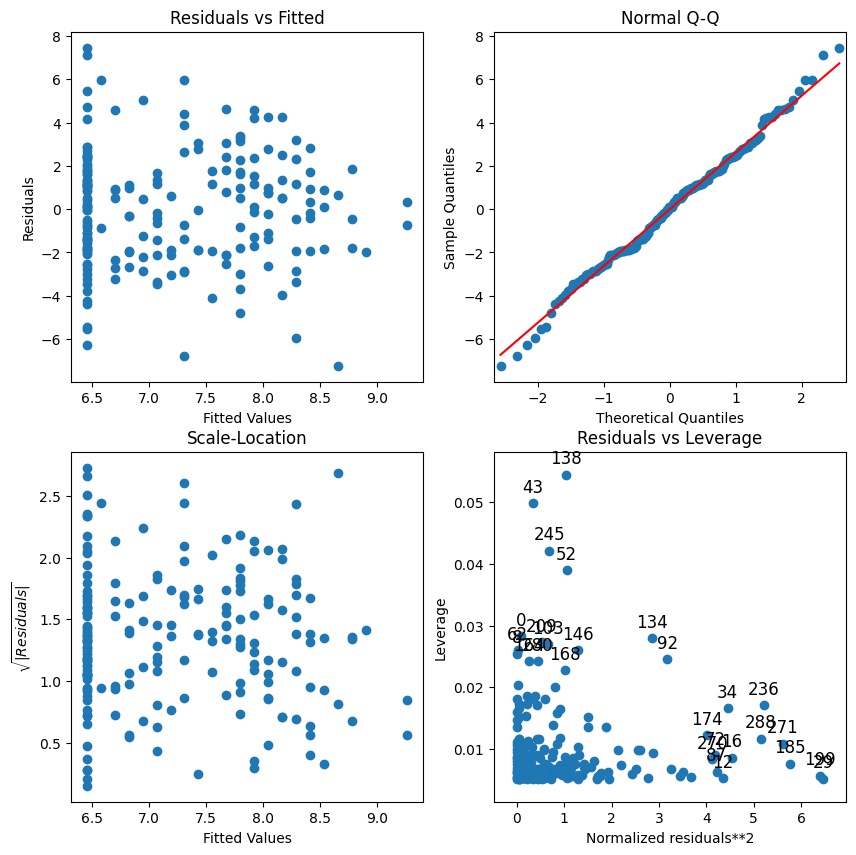

In [73]:
modele4 = sm.formula.ols('Sales ~ Advertising', data=df).fit()
print(modele4.summary())

anova = sm.stats.anova_lm(modele4)
print(anova)

residuals = modele4.resid
fitted = modele4.fittedvalues
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].scatter(fitted, residuals)
ax[0][0].set_xlabel('Fitted Values')
ax[0][0].set_ylabel('Residuals')
ax[0][0].set_title('Residuals vs Fitted')

sm.qqplot(residuals, line='s', ax=ax[0][1])
ax[0][1].set_title('Normal Q-Q')

sqrt_abs_residuals = np.sqrt(np.abs(residuals))
ax[1][0].scatter(fitted, sqrt_abs_residuals)
ax[1][0].set_xlabel('Fitted Values')
ax[1][0].set_ylabel('$\sqrt{|Residuals|}$')
ax[1][0].set_title('Scale-Location')

sm.graphics.plot_leverage_resid2(modele4, ax=ax[1][1])
ax[1][1].set_title('Residuals vs Leverage')
plt.show()

### Modèle 5

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     11.50
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           0.000845
Time:                        00:53:47   Log-Likelihood:                -152.42
No. Observations:                 195   AIC:                             308.8
Df Residuals:                     193   BIC:                             315.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

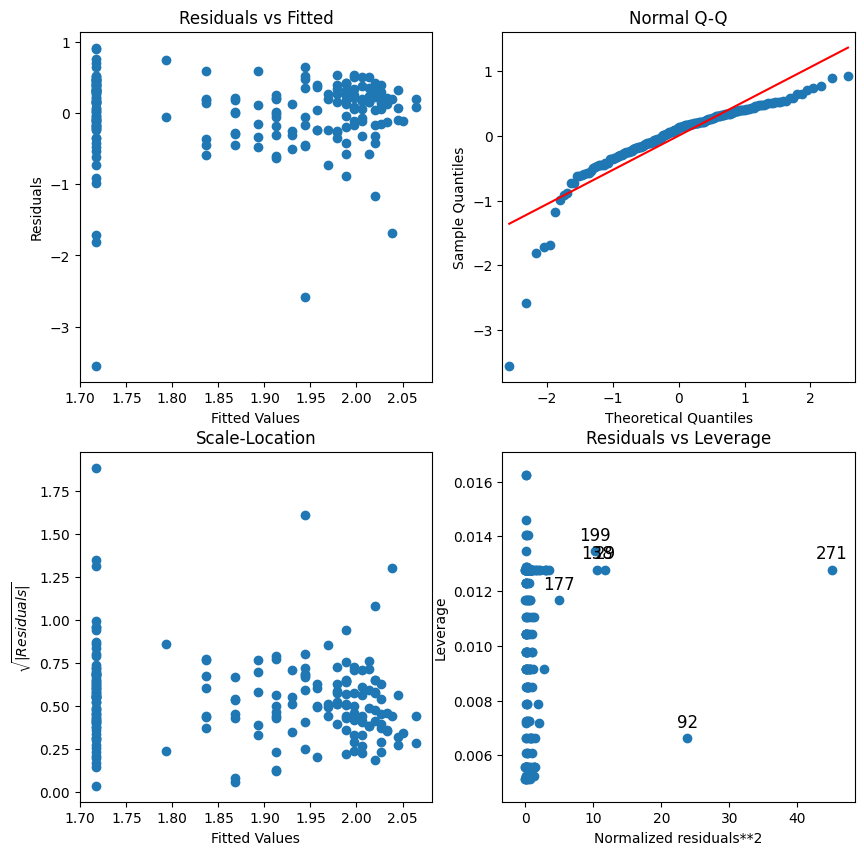

In [81]:
modele5 = sm.formula.ols('np.log(Sales) ~ np.log(Advertising + 1)', data=df).fit()
print(modele5.summary())

anova = sm.stats.anova_lm(modele5)
print(anova)

residuals = modele5.resid
fitted = modele5.fittedvalues
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].scatter(fitted, residuals)
ax[0][0].set_xlabel('Fitted Values')
ax[0][0].set_ylabel('Residuals')
ax[0][0].set_title('Residuals vs Fitted')

sm.qqplot(residuals, line='s', ax=ax[0][1])
ax[0][1].set_title('Normal Q-Q')

sqrt_abs_residuals = np.sqrt(np.abs(residuals))
ax[1][0].scatter(fitted, sqrt_abs_residuals)
ax[1][0].set_xlabel('Fitted Values')
ax[1][0].set_ylabel('$\sqrt{|Residuals|}$')
ax[1][0].set_title('Scale-Location')

sm.graphics.plot_leverage_resid2(modele5, ax=ax[1][1])
ax[1][1].set_title('Residuals vs Leverage')
plt.show()

### Modèle 6

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           0.000628
Time:                        00:55:52   Log-Likelihood:                -152.14
No. Observations:                 195   AIC:                             308.3
Df Residuals:                     193   BIC:                             314.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7407      0.054     32.173      

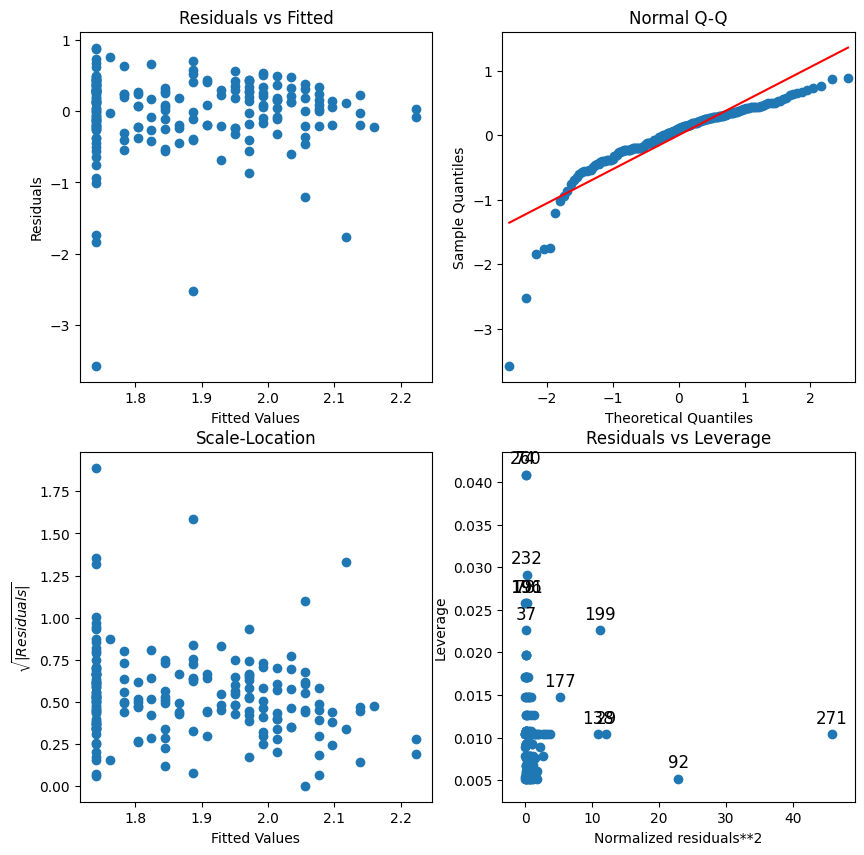

In [84]:
modele6 = sm.formula.ols('np.log(Sales) ~ Advertising', data=df).fit()
print(modele6.summary())

anova = sm.stats.anova_lm(modele6)
print(anova)

residuals = modele6.resid
fitted = modele6.fittedvalues
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].scatter(fitted, residuals)
ax[0][0].set_xlabel('Fitted Values')
ax[0][0].set_ylabel('Residuals')
ax[0][0].set_title('Residuals vs Fitted')

sm.qqplot(residuals, line='s', ax=ax[0][1])
ax[0][1].set_title('Normal Q-Q')

sqrt_abs_residuals = np.sqrt(np.abs(residuals))
ax[1][0].scatter(fitted, sqrt_abs_residuals)
ax[1][0].set_xlabel('Fitted Values')
ax[1][0].set_ylabel('$\sqrt{|Residuals|}$')
ax[1][0].set_title('Scale-Location')

sm.graphics.plot_leverage_resid2(modele6, ax=ax[1][1])
ax[1][1].set_title('Residuals vs Leverage')
plt.show()